# Entropy Example Notebook
## "Explain Me This: Salience-Based Explainability for Synthetic Face Detection Models"
### by ****, 1/31/23

In [26]:
import os
import os
import glob
import argparse
import skimage.io
import skimage.filters
import matplotlib.image as mpimg
import skimage
import skimage.measure
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

## Necessary Arguments

In [17]:
parser = argparse.ArgumentParser()
# dummy argument to work in Jupyter Notebook instead of command line
parser.add_argument('-f')
parser.add_argument('-d','--dataset', default="../../Salience/GradCAMs/ffhq_aligned/00001.png")
parser.add_argument('-t', '--type', default="gradcam")

args = vars(parser.parse_args())

## Calculate Normalized Entropy

In [21]:
# Read in the Image
cam = mpimg.imread(args['dataset'])
# Calculate Entropy
entropy = skimage.measure.shannon_entropy(cam)
# Normalize w.r.t. size (Note: See details in paper)
normalized_entropy = round(entropy / 5.614, 3)
print(normalized_entropy)

0.542


## Display Image

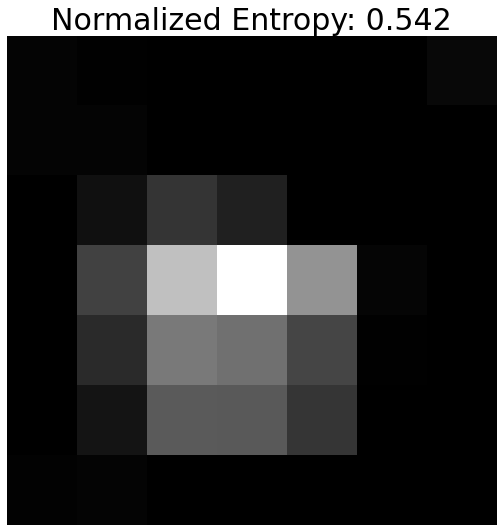

In [28]:
fig = plt.figure(figsize=(10., 8.), facecolor='white')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for index, (ax, im) in enumerate(zip(grid, [cam])):
    # Iterating over the grid returns the Axes.
    ax.axis('off')
    ax.grid(b=None)
    ax.imshow(im)
    ax.set_title("Normalized Entropy: " + str(normalized_entropy), fontsize=30)
fig.set_size_inches(18, 9)
#plt.savefig("entropy-densenet-example.png", format='png', bbox_inches='tight', dpi = 500)
plt.show()